In [17]:
# coding: utf-8
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
from tools import *
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import et séparation des données

In [12]:
data = np.load("15_scenes_Xy.npz", "rb")
X = data["X"]
y = data["y"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.66)

In [15]:
print(X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0])

0.6998885172798216 0.10189520624303233 0.19821627647714604


## Apprentissage SVM

In [24]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [28]:
clf = LinearSVC(C=1.0)#gamma='auto')
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
clf.score(X_val, y_val)

0.6455142231947484

* Gaussien : 0.53 en validation
* Linéaire : 0.65 en validation

In [60]:
clf = SVC(C=50)#gamma='auto')
clf.fit(X_train, y_train)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
print(clf.score(X_train, y_train), clf.score(X_val, y_val))

0.9996814272061166 0.5448577680525164


## Sélection du paramètre C

In [89]:
Cs = np.logspace(-5, 1.0, num=25)
Cs

array([1.00000000e-05, 1.77827941e-05, 3.16227766e-05, 5.62341325e-05,
       1.00000000e-04, 1.77827941e-04, 3.16227766e-04, 5.62341325e-04,
       1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01])

In [91]:
clfs = []
scores_train = []
scores_valid = []
for i in Cs:
    print(i)
    clf = LinearSVC(C=i)#gamma='auto')
    clf.fit(X_train, y_train)
    clfs.append(clf)
    scores_train.append(clf.score(X_train, y_train))
    scores_valid.append(clf.score(X_val, y_val))

1e-05
1.778279410038923e-05
3.1622776601683795e-05
5.623413251903491e-05
0.0001
0.00017782794100389227
0.00031622776601683794
0.0005623413251903491
0.001
0.0017782794100389228
0.0031622776601683794
0.005623413251903491
0.01
0.01778279410038923
0.03162277660168379
0.05623413251903491
0.1
0.1778279410038923
0.31622776601683794
0.5623413251903491
1.0
1.7782794100389228
3.1622776601683795
5.623413251903491
10.0


<IPython.core.display.Javascript object>


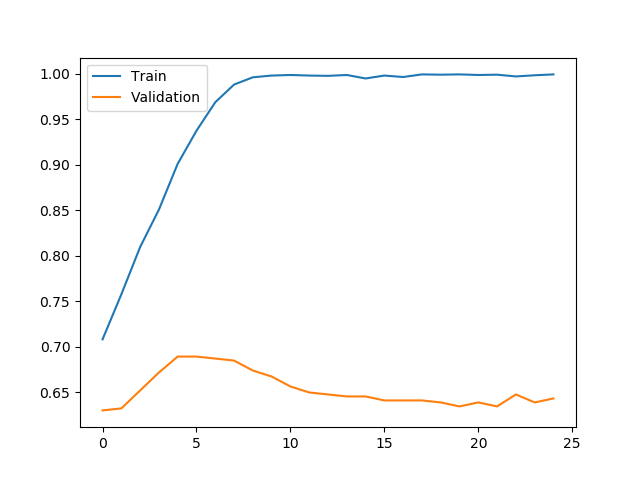

In [92]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(range(25), scores_train, label="Train")
plt.plot(range(25),scores_valid, label="Validation")
plt.legend()
plt.show()

## Score final en test

In [93]:
i = np.argmax(scores_valid)
score = clfs[i].score(X_test, y_test)
meilleur_clf = clfs[i]
print(i, Cs[i], scores_train[i], scores_valid[i], score)

4 0.0001 0.9009238611022619 0.6892778993435449 0.7289088863892014


Résultats sur la plage de Cs = np.logspace(-10, 2.0, num=25)   
Meilleur Cs : 12è soit 0.0001,   
Scores : train (0.901), valid (0.689), test (0.729)

### coin

In [44]:
#parameters = {'C':np.arange(10)}
parameters = {'C':[1, 5]}
svc = LinearSVC()
gs_svc = GridSearchCV(svc, parameters)
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']